# 1. Import and Install Dependencies

In [2]:
!pip install  opencv-python mediapipe sklearn matplotlib 
#tensorflow-gpu==2.4.1

In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

this is for the frequency stuff

In [8]:
!pip install pyaudio
!pip install pysinewave
import time
import pyaudio
from pysinewave import SineWave
import pyaudio as p

In [14]:
import time

import pyaudio
from pysinewave import SineWave
import pyaudio as p

p = pyaudio.PyAudio()

def s():
    sinewave = SineWave(pitch=0, pitch_per_second=10, decibels_per_second=30)
    sinewave.set_volume(50)
    sinewave.play()
    time.sleep(3)
    sinewave.stop()
if __name__ == "__main__":
    s()

In [ ]:
!pip install synthesizer
from synthesizer import Player, Synthesizer, Waveform

In [36]:
chord = ["C3", "E3", "G3"]
chord = ['b5']
player = Player()
player.open_stream()
synthesizer = Synthesizer(osc1_waveform=Waveform.sine, osc1_volume=1.0, use_osc2=False)
player.play_wave(synthesizer.generate_chord(chord, 3.0))
synthesizer.generate_chord

this runs the video feed

In [9]:
cap = cv2.VideoCapture(0)
# get height and width of screen
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    sinewave = SineWave(pitch=0, pitch_per_second=10, decibels_per_second=20)
    sinewave.play()
    left_pos = 0
    right_pos = 0

    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        # print(results)

        # from results find left hand position and caalculate what pitch to play
        
        if results.left_hand_landmarks != None:
            left_pos = results.left_hand_landmarks.landmark[0]
        if results.right_hand_landmarks != None:
            right_pos = results.right_hand_landmarks.landmark[0]

            
            x_pos = right_pos.x
            y_pos = left_pos.y
            
            # range 0 to 50
            volume = y_pos * 50
            sinewave.set_volume(volume)

            # range -10 to 10
            x_pos = 1 - x_pos
            pitch = (1-x_pos) * -10 + (x_pos)*10
            sinewave.set_pitch(pitch)
            
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    sinewave.stop()
    cv2.destroyAllWindows()

TypeError: cannot unpack non-iterable int object

In [18]:
cap.release()

In [19]:
draw_landmarks(frame, results)

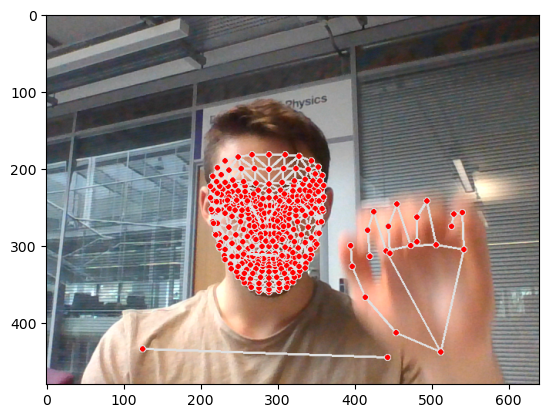

In [20]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [27]:
len(results.face_landmarks.landmark)
pos = results.left_hand_landmarks.landmark[0]
pos

x: 0.8006719946861267
y: 0.91343092918396
z: -7.805844006725238e-07

In [19]:
def extract_keypoints(results):
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    # pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    # lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    # rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    # return np.concatenate([pose, face, lh, rh])
    return face

In [20]:
result_test = extract_keypoints(results)

In [21]:
result_test.shape

(1404,)

In [22]:
np.save('0', result_test)

In [23]:
np.load('0.npy')

array([ 0.50868654,  0.56067908, -0.01890518, ...,  0.58487368,
        0.37169144, -0.00098952])

# 4. Setup Folders for Collection

In [25]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
# actions = np.array(['hello', 'thanks', 'iloveyou'])
actions = np.array(['speaking', 'not speaking'])

# Thirty videos worth of data
no_sequences = 40

# Videos are going to be 30 frames in length
sequence_length = 100

# Folder start
# start_folder = 30

In [26]:
for action in actions: 
    # dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(0,no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [27]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        cv2.waitKey(5000)
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    # cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

In [28]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [54]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [55]:
label_map = {label:num for num, label in enumerate(actions)}

In [76]:
label_map

{'speaking': 0, 'not speaking': 1}

In [77]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [78]:
np.array(sequences).shape

(80, 100, 1404)

In [80]:
np.array(labels).shape

(80,)

In [79]:
X = np.array(sequences)

In [81]:
X.shape

(80, 100, 1404)

In [82]:
y = to_categorical(labels).astype(int)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [84]:
y_test.shape

(4, 2)

In [114]:
X = X[:,:30,:]
print(X.shape)

(80, 30, 1404)


# 7. Build and Train LSTM Neural Network

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [85]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [157]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, activation='relu', input_shape=(30,1404)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [158]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [159]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
3/3 [==============================] - 2s 106ms/step - loss: 1.0955 - categorical_accuracy: 0.4868
Epoch 2/1000
3/3 [==============================] - 0s 105ms/step - loss: 13.5564 - categorical_accuracy: 0.4605
Epoch 3/1000
3/3 [==============================] - 0s 105ms/step - loss: 5.0971 - categorical_accuracy: 0.5132
Epoch 4/1000
3/3 [==============================] - 0s 106ms/step - loss: 40.7296 - categorical_accuracy: 0.4605
Epoch 5/1000
3/3 [==============================] - 0s 106ms/step - loss: 18.0794 - categorical_accuracy: 0.5658
Epoch 6/1000
3/3 [==============================] - 0s 105ms/step - loss: 15.5441 - categorical_accuracy: 0.4342
Epoch 7/1000
3/3 [==============================] - 0s 103ms/step - loss: 13.2337 - categorical_accuracy: 0.4605
Epoch 8/1000
3/3 [==============================] - 0s 102ms/step - loss: 15.4384 - categorical_accuracy: 0.5658
Epoch 9/1000
3/3 [==============================] - 0s 103ms/step - loss: 23.2260 - categorical_ac

KeyboardInterrupt: 

In [119]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 30, 128)           784896    
                                                                 
 lstm_34 (LSTM)              (None, 30, 128)           131584    
                                                                 
 lstm_35 (LSTM)              (None, 64)                49408     
                                                                 
 dense_33 (Dense)            (None, 64)                4160      
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 2)                 66        
                                                                 
Total params: 972,194
Trainable params: 972,194
Non-t

# 8. Make Predictions

In [149]:
res = model.predict(X_test)

1/1 [==============================] - 0s 233ms/step


In [150]:
actions[np.argmax(res[3])]

'speaking'

In [151]:
actions[np.argmax(y_test[3])]

'speaking'

# 9. Save Weights

In [152]:
model.save('action.h5')

In [217]:
del model

In [14]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [129]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [153]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 29ms/step


In [154]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [155]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[1, 1],
        [1, 1]],

       [[1, 1],
        [1, 1]]], dtype=int64)

In [156]:
accuracy_score(ytrue, yhat)

0.5

# 11. Test in Real Time

In [134]:
from scipy import stats

In [135]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

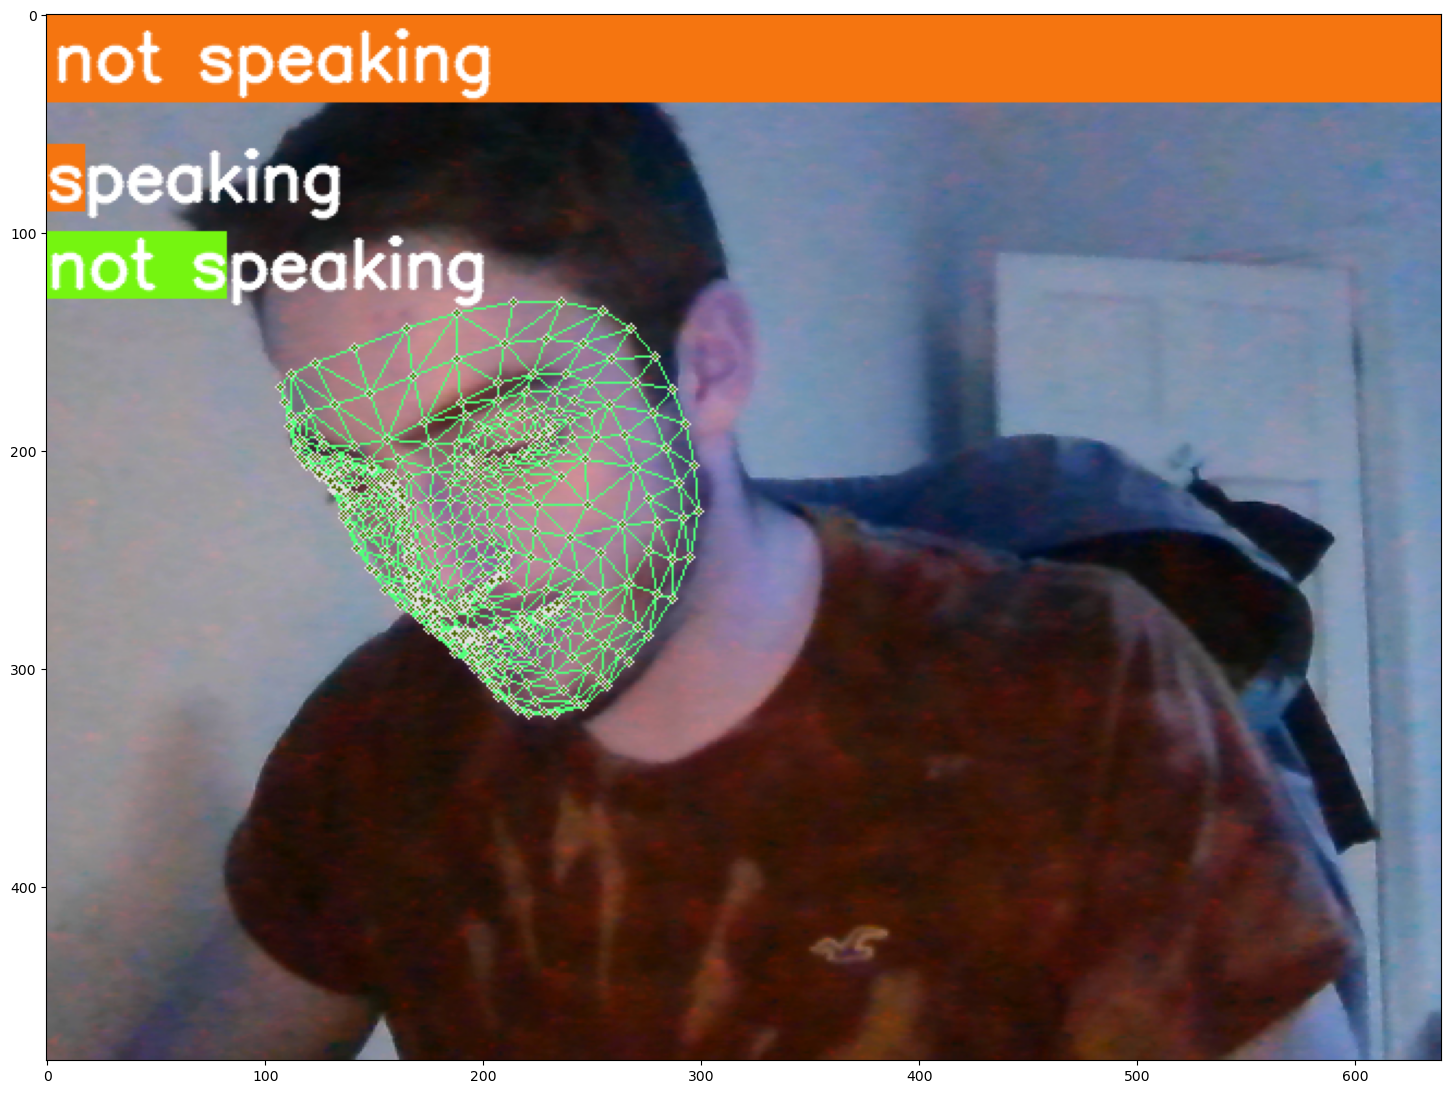

In [138]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [139]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        # sequence.append(keypoints)
        sequence.insert(0,keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti